# Modelos de regresión Lineal

## Modelo con datos simulados

* y = a + (b * x)
* X : 100 valores distribuidos según una N(1.5, 2.5)
* Ye = 5 + (1.9 * x)
* e estara distribuido según una N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 1.9 * x

In [5]:
y_act = 5 + 1.9 * x + res

In [8]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [9]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion": y_pred_list
    }
)

In [10]:
data.head()

,x,y_actual,y_prediccion
0,6.886312,18.543588,18.083993
1,-0.059555,4.789188,4.886846
2,2.117465,10.253985,9.023184
3,-1.379773,4.508638,2.378432
4,0.987940,5.725461,6.877085


In [11]:
import matplotlib.pyplot as plt

In [14]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

In [12]:
%matplotlib inline

Text(0.5, 1.0, 'Valuar actual vs valor predecido')

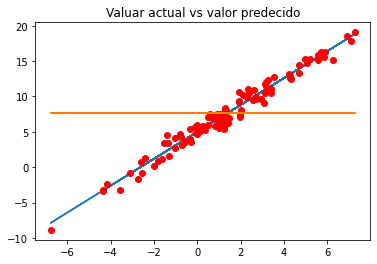

In [15]:
plt.plot(x, y_pred)
plt.plot(x, y_act,"ro")
plt.plot(x, y_mean)
plt.title("Valuar actual vs valor predecido")

In [16]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"] - data["y_actual"])**2 
data["SST"] = (data["y_actual"] -np.mean(y_act))**2

In [17]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,6.886312,18.543588,18.083993,107.920321,0.211227,117.680520
1,-0.059555,4.789188,4.886846,7.888665,0.009537,8.446779
2,2.117465,10.253985,9.023184,1.762686,1.514870,6.545731
3,-1.379773,4.508638,2.378432,28.271451,4.537776,10.156235
4,0.987940,5.725461,6.877085,0.669840,1.326237,3.881141


In [18]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [19]:
SSR

2781.2741703409165

In [20]:
SSD

78.26177736359546

In [21]:
SST

2859.601234381232

In [22]:
SSR + SSD

2859.535947704512

In [23]:
R2 = SSR/SST

In [25]:
R2

0.9726090955974621

(array([ 2.,  2., 13., 13., 14., 10., 22., 13.,  7.,  4.]),
 array([-2.1302056 , -1.73237984, -1.33455408, -0.93672832, -0.53890257,
        -0.14107681,  0.25674895,  0.65457471,  1.05240046,  1.45022622,
         1.84805198]),
 <BarContainer object of 10 artists>)

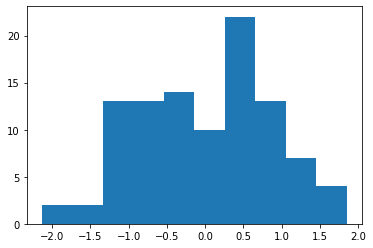

In [27]:
plt.hist(data["y_prediccion"] - data["y_actual"])

## Obteniendo la recta de la regresión

* y = a + b * x
* b = sum((xi * x_m) * (yi-y_m)) / sum(xi-x_m)**2
* a = y_m - b * x_m

In [28]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.4291536790483637, 7.695522397079103)

In [29]:
data["beta_n"] = (data["x"] - x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"] - x_mean)**2

In [30]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [31]:
alpha = y_mean - beta * x_mean

In [33]:
alpha, beta

(4.980059990918965, 1.90004927109609)

El modelo lineal obtenido por regresión es:
y = 4.980059990918965 + (1.90004927109609 * x)

In [34]:
data["y_model"] = alpha + beta * data["x"]

In [35]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,6.886312,18.543588,18.083993,107.920321,0.211227,117.680520,59.199611,29.780578,18.064392
1,-0.059555,4.789188,4.886846,7.888665,0.009537,8.446779,4.326685,2.216253,4.866903
2,2.117465,10.253985,9.023184,1.762686,1.514870,6.545731,1.761020,0.473773,9.003349
3,-1.379773,4.508638,2.378432,28.271451,4.537776,10.156235,8.951725,7.890067,2.358424
4,0.987940,5.725461,6.877085,0.669840,1.326237,3.881141,0.869219,0.194670,6.857194


In [37]:
SSR = sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y_actual"])**2) 
SST = sum((data["y_actual"] - y_mean)**2)

In [38]:
SSR, SSD, SST

(2781.3789389609983, 78.22229542023315, 2859.601234381232)

In [39]:
R2 = SSR / SST
R2

0.9726457330904181

Text(0.5, 1.0, 'Valuar actual vs valor predecido')

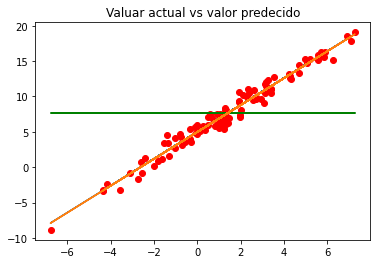

In [40]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
%matplotlib inline
plt.plot(data["x"], data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valuar actual vs valor predecido")

# Error estándar de los residuos (RSE)

In [43]:
RSE = np.sqrt(SSD/(len(data) - 2))

In [44]:
RSE

0.8934129436948867

In [46]:
np.mean(data["y_actual"])

7.695522397079103

In [47]:
RSE / np.mean(data["y_actual"])

0.11609516516175544